In [70]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/ekenee/Desktop/Heart Attack.csv")

# Heart Attack Dataset
- Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD deaths, with one-third of these deaths occurring before the age of 70. 
- The main purpose here is to analyze characteristics of a heart attack or factors that contribute to it.
- This data was taken from 1319 patients ranging from the ages of 14 to 103.

# All of Heart Attack Dataset Info 
- The dataset columns consist of age, gender, impulse(heart rate), pressurehight(systolic blood pressure), pressurelow(diastolic blood pressure), glucose(blood sugar), kcm(CK-MB), troponin(test-troponin), and class
- The class column pertains to the presence of heart attack, which is divided into two categories (negative and positive). Negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.


In [71]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# Changing Gender Column Values
- You may notice how all the values in the gender column are 1's or 0's. 
- A variable measured on a "nominal" scale is a variable that does not really have any evaluative distinction. 
- A good example of a nominal variable is sex (or gender). 
- Information in a data set on sex is usually coded as 0 or 1, 1 indicating male and 0 indicating female.
- That genders being represented as numbers may make the data harder to read for other people, so we will be replacing the values with the words 'males' and 'females'(female - 0 , male - 1).


In [72]:
df = df.replace(0,'female')
df = df.replace(1,'male')

In [73]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,male,66,160,83,160.0,1.8,0.012,negative
1,21,male,94,98,46,296.0,6.75,1.060,positive
2,55,male,64,160,77,270.0,1.99,0.003,negative
3,64,male,70,120,55,270.0,13.87,0.122,positive
4,55,male,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,male,94,122,67,204.0,1.63,0.006,negative
1315,66,male,84,125,55,149.0,1.33,0.172,positive
1316,45,male,85,168,104,96.0,1.24,4.250,positive
1317,54,male,58,117,68,443.0,5.8,0.359,positive


# Organizing Blood Pressure Levels into DataFrames
- I Organized the blood pressure dataframes based on a chart from the American Heart Association that can be found here - https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

- normalBP - normal blood pressure group
- highBP1 - high blood pressure stage 1 group
- highBP2 - high blood pressure stage 2 group 
- highBP3 - high blood pressure stage 3 (Hypertensive Crisis) group 


In [74]:
normalBP = df.loc[(df['pressurehight'] < 120) & 
                  (df['pressurelow'] < 80)]

highBP1 = df.loc[((df['pressurehight'] >= 130) &
                  (df['pressurehight'] <= 139))|
                  ((df['pressurelow'] >= 80) & 
                   (df['pressurelow'] <= 89))]
highBP2 = df.loc[((df['pressurehight'] >= 140) &
                  (df['pressurehight'] <= 180))|
                  ((df['pressurelow'] >= 90) & 
                   (df['pressurelow'] <= 120))]
highBP3 = df.loc[((df['pressurehight'] >= 180) &
                  (df['pressurelow'] >= 120))|
                  ((df['pressurehight'] >= 180) | 
                   (df['pressurelow'] >= 120))]

- The positive dataframe is for people who tested positive for heart attacks, while the negative dataframe is for patients who tested negative for heart attacks.
- From this calculation we can conclude that more people had heart attacks than people that didn't have heart attacks within the normal blood pressure patient group, which is quite odd.
- People who had heart attacks: 332
- People who didn't have heart attacks: 187

In [75]:
negative = normalBP[normalBP['class'] == 'negative']
positive = normalBP[normalBP['class'] == 'positive']

print(positive.shape[0])
print(negative.shape[0])

332
187


- The positive1 dataframe is for people who tested positive for heart attacks, while the negative1 dataframe is for patients who tested negative for heart attacks.
- From this calculation we can conclude that more people had heart attacks than people who didn't have heart attacks within the high blood pressure stage 3 patient group.
- People who had heart attacks: 28
- People who didn't have heart attacks: 14

In [76]:
negative1= highBP3[highBP3['class'] == 'negative']
positive1= highBP3[highBP3['class'] == 'positive']

print(negative1.shape[0])
print(positive1.shape[0])

14
28


# High Blood Pressure by Age Group
- For the next few blocks of code we will be finding trends in the high blood pressure stage 3 group based on each patient's age range.
- The data groups I have created are broken into age groups of adults, middle aged, and elderly.
- adult(ages 18 - 40), middleage(ages 40 - 60), elderly(ages over 60)
- I measured their pressure high on the y axis and their pressure low on the x axis.

In [77]:
adult = highBP3.loc[(highBP3['age'] >= 18) & (highBP3['age'] <= 40)]
middleage = highBP3.loc[(highBP3['age'] > 40) & (highBP3['age'] <= 60)]
elderly = highBP3.loc[(highBP3['age'] > 60)]

- This is the visualization of negative and positive heart attack patients from the adult high blood pressure group.
- It seems like most of the patients from this group have not had a heart attack, but the patient with the highest pressure high and low seemed to have tested positive for a heart attack. This is somewhat expected.

[Text(0.5, 0, 'Pressure Low'), Text(0, 0.5, 'Pressure High')]

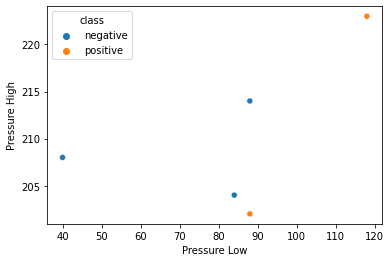

In [78]:
sns.scatterplot(data=adult, x="pressurelow", y="pressurehight", hue="class").set(xlabel = 'Pressure Low', ylabel = 'Pressure High')

- This is the visualization of negative and positive heart attack patients from the middle aged high blood pressure group.
- It looks like the majority of the patients from this group experienced heart attacks. The number of heart attacks have increased as the age went from adult to middle aged.

[Text(0.5, 0, 'Pressure Low'), Text(0, 0.5, 'Pressure High')]

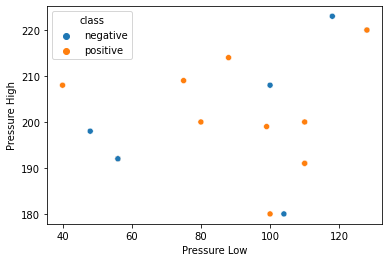

In [79]:
sns.scatterplot(data=middleage, x="pressurelow", y="pressurehight", hue="class").set(xlabel = 'Pressure Low', ylabel = 'Pressure High')

- This is the visualization of negative and positive heart attack patients from the elderly high blood pressure group.
- It looks like the majority of the patients from this group experienced heart attacks as well. The number of heart attacks has increased even further going from the middle aged group to the elderly group.

[Text(0.5, 0, 'Pressure Low'), Text(0, 0.5, 'Pressure High')]

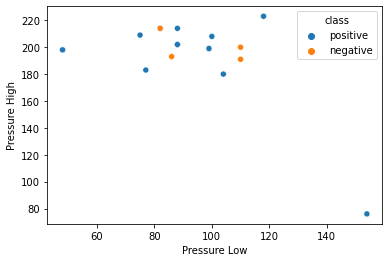

In [80]:
sns.scatterplot(data=elderly, x="pressurelow", y="pressurehight", hue="class").set(xlabel = 'Pressure Low', ylabel = 'Pressure High')

- From counting the number of heart attacks from each age group we can conclude as the patients with high blood pressure got older, the more of them experienced heart attacks. 
- 2 positive for the adult group,  11 positive for the middle aged group, and 15 positive for the elderly group. 

In [81]:
print('High Blood Pressure Patients')
print('Adult Heart Attack Count : ' + str(adult[adult['class'] == 'positive'].shape[0]))
print('Middle Aged Heart Attack Count: ' + str(middleage[middleage['class'] == 'positive'].shape[0]))
print('Elderly Heart Attack Count: ' + str(elderly[ elderly['class'] == 'positive'].shape[0]))

High Blood Pressure Patients
Adult Heart Attack Count : 2
Middle Aged Heart Attack Count: 11
Elderly Heart Attack Count: 15


# Normal Blood Pressure by Age Group
- For the next few blocks of code we will be finding trends in the normal blood pressure group based on each patient's age range.
- I'm using the same criteria for the age groups that I used in the high blood pressure group.
- I measure their pressure highs on the y axis and their pressure lows on the x axis.

In [82]:
adult = normalBP.loc[(normalBP['age'] >= 18) & (normalBP['age'] <= 40)]
middleage = normalBP.loc[(normalBP['age'] > 40) & (normalBP['age'] <= 60)]
elderly = normalBP.loc[(normalBP['age'] > 60)]

- This is the visualization of negative and positive heart attack patients from the adult normal blood pressure group.
- It seems like there's a somewhat equal amount of patients that had heart attacks versus didn't have heart attacks according to the scatter plot graph.

[Text(0.5, 0, 'Pressure Low'), Text(0, 0.5, 'Pressure High')]

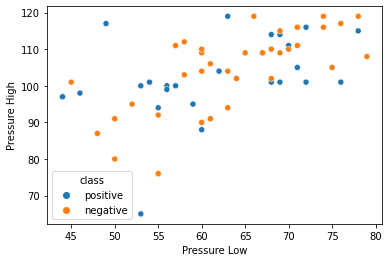

In [83]:
sns.scatterplot(data=adult, x="pressurelow", y="pressurehight", hue="class").set(xlabel = 'Pressure Low', ylabel = 'Pressure High')

- This is the visualization of negative and positive heart attack patients from the middle aged normal blood pressure group.
- It seems like as we went from the adult group to the middle aged group the amount of heart attacks have increased a decent amount.
- There are more patients who have experienced heart attacks than those who have not in this group.

[Text(0.5, 0, 'Pressure Low'), Text(0, 0.5, 'Pressure High')]

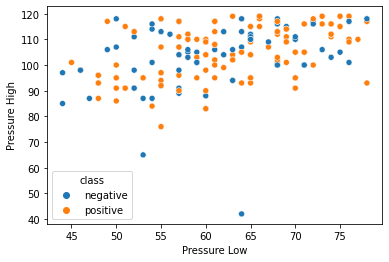

In [84]:
sns.scatterplot(data=middleage, x="pressurelow", y="pressurehight", hue="class").set(xlabel = 'Pressure Low', ylabel = 'Pressure High')

- This is the visualization of negative and positive heart attack patients from the elderly normal blood pressure group.
- It looks like there are more people who have experienced heart attacks than those who have not in this age group as well.

[Text(0.5, 0, 'Pressure Low'), Text(0, 0.5, 'Pressure High')]

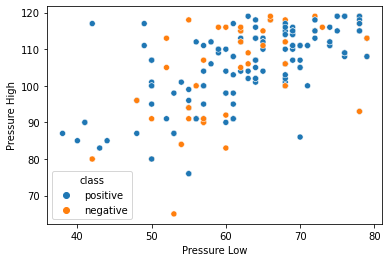

In [85]:
sns.scatterplot(data=elderly, x="pressurelow", y="pressurehight", hue="class").set(xlabel = 'Pressure Low', ylabel = 'Pressure High')

- From counting the number of heart attacks from each age group we can conclude as the patients with normal blood pressure got older, the more of them experienced heart attacks.
- Although, going from the middle aged to the elderly group we can see that the amount of patients that have had heart attacks decreased by 3.
- 33 positive for the adult group, 151 positive for the middle aged group, and 148 positive for the elderly group

In [86]:
print('Normal Blood Pressure Patients')
print('Adult Heart Attack Count : ' + str(adult[adult['class'] == 'positive'].shape[0]))
print('Middle Aged Heart Attack Count: ' + str(middleage[middleage['class'] == 'positive'].shape[0]))
print('Elderly Heart Attack Count: ' + str(elderly[ elderly['class'] == 'positive'].shape[0]))

Normal Blood Pressure Patients
Adult Heart Attack Count : 33
Middle Aged Heart Attack Count: 151
Elderly Heart Attack Count: 148


# Heart Attacks Based on Gender
- In the next couple of blocks of code we'll take a look at a visualization and trends that can help us determine the likelihood of a heart attack based on the patient's gender.
- The y axis represents the blood pressure high and the x axis represents the blood pressure low
- x symbols represent females and the dot symbols represent males

<AxesSubplot:xlabel='pressurelow', ylabel='pressurehight'>

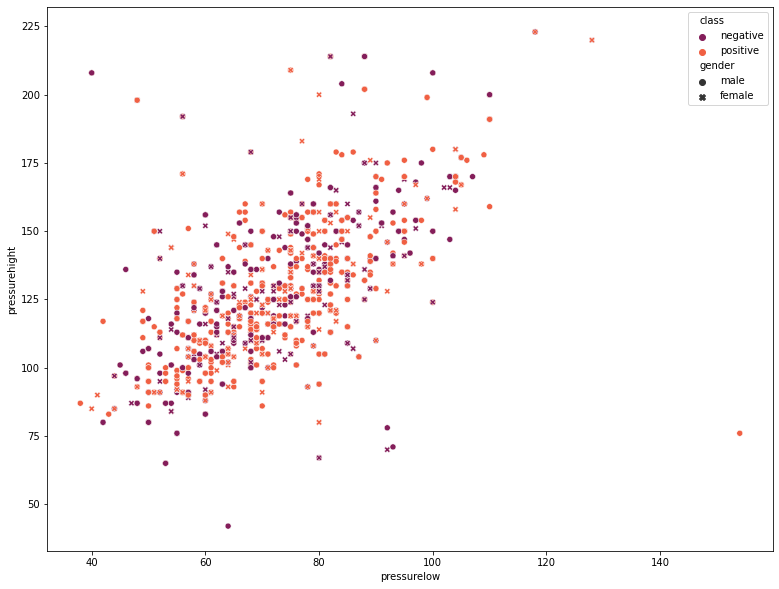

In [87]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=df, x="pressurelow", y="pressurehight", hue="class", style = "gender", palette = 'rocket')

- When we calculate the number of patients that have had heart attacks based on gender, it seems like the male group is significantly more likely to have a heart attack.
- 563 males positive for heart attacks, 247 females positive for heart attacks

In [88]:
males = df[df['gender'] == 'male']
females = df[df['gender'] == 'female']
print('Male Heart Attack Count : ' + str(males[males['class'] == 'positive'].shape[0]))
print('Female Heart Attack Count : ' + str(females[females['class'] == 'positive'].shape[0]))

Male Heart Attack Count : 563
Female Heart Attack Count : 247


# Glucose Levels Based on Blood Pressure and Gender
- I will be comparing the different blood pressure groups and trying to find how these groups' genders may affect their glucose levels(blood sugar level). 

[Text(0.5, 1.0, 'High Blood Pressure Stage 3 Patients'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Glucose Level')]

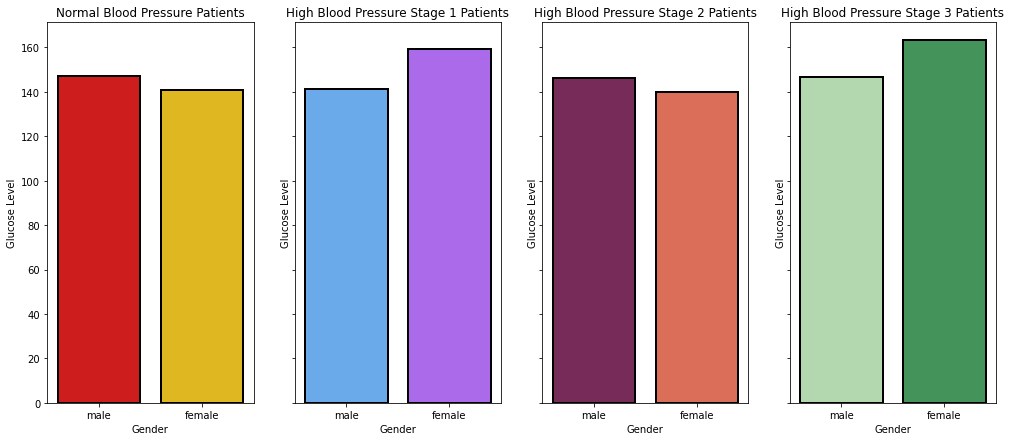

In [89]:
fig, axes = plt.subplots(1, 4, figsize=(17, 7), sharey=True)

sns.barplot(ax=axes[0], data = normalBP, x = 'gender', y ='glucose', palette = 'hot', edgecolor = 'black', lw = 2, ci = None)
axes[0].set(title = 'Normal Blood Pressure Patients', xlabel = 'Gender', ylabel = 'Glucose Level')

sns.barplot(ax=axes[1], data = highBP1, x = 'gender', y ='glucose', palette = 'cool', edgecolor = 'black', lw = 2, ci = None)
axes[1].set(title = 'High Blood Pressure Stage 1 Patients', xlabel = 'Gender', ylabel = 'Glucose Level')

sns.barplot(ax=axes[2], data = highBP2, x = 'gender', y ='glucose', palette = 'rocket', edgecolor = 'black', lw = 2, ci = None)
axes[2].set(title = 'High Blood Pressure Stage 2 Patients', xlabel = 'Gender', ylabel = 'Glucose Level')

sns.barplot(ax=axes[3], data = highBP3, x = 'gender', y ='glucose', palette = 'Greens', edgecolor = 'black', lw = 2, ci = None)
axes[3].set(title = 'High Blood Pressure Stage 3 Patients', xlabel = 'Gender', ylabel = 'Glucose Level')

- In the normal blood pressure group the average glucose level for males is about 147, and for the females it's about 141.
- In the high blood pressure stage 1 group the average glucose level for males is about 141, and for the females it's about 159.
- In the high blood pressure stage 2 group the average glucose level for males is about 146, and for the females it's about 140.
- In the high blood pressure stage 3 group the average glucose level for males is about 147, and for the females it's about 163.
- It seems like for the males the blood pressure level rising didn't affect the average glucose levels too much.
- For the females we see somewhat of a gradual increase in the average glucose levels as the blood pressure groups go up. Although, there was a decrease going from the high blood pressure stage 1 group to the high blood pressure stage 2 group. 

In [90]:
print('Normal Blood Pressue Patients Glucose Level Averages')
print('Male ' + str(normalBP[normalBP['gender'] == 'male'][['glucose']].mean()))
print('Female ' + str(normalBP[normalBP['gender'] == 'female'][['glucose']].mean()))

print('High Blood Pressue Stage 1 Patients Glucose Level Averages')
print('Male ' + str(highBP1[highBP1['gender'] == 'male'][['glucose']].mean()))
print('Female ' + str(highBP1[highBP1['gender'] == 'female'][['glucose']].mean()))

print('High Blood Pressue Stage 2 Patients Glucose Level Averages')
print('Male ' + str(highBP2[highBP2['gender'] == 'male'][['glucose']].mean()))
print('Female ' + str(highBP2[highBP2['gender'] == 'female'][['glucose']].mean()))

print('High Blood Pressue Stage 3 Patients Glucose Level Averages')
print('Male ' + str(highBP3[highBP3['gender'] == 'male'][['glucose']].mean()))
print('Female ' + str(highBP3[highBP3['gender'] == 'female'][['glucose']].mean()))


Normal Blood Pressue Patients Glucose Level Averages
Male glucose    147.025568
dtype: float64
Female glucose    140.796407
dtype: float64
High Blood Pressue Stage 1 Patients Glucose Level Averages
Male glucose    141.198157
dtype: float64
Female glucose    159.452991
dtype: float64
High Blood Pressue Stage 2 Patients Glucose Level Averages
Male glucose    146.088462
dtype: float64
Female glucose    139.85122
dtype: float64
High Blood Pressue Stage 3 Patients Glucose Level Averages
Male glucose    146.88
dtype: float64
Female glucose    163.176471
dtype: float64
